## Dsci 100 Project Planning Stage
#### Akaash Aujla 93671741 (Group 46)

### 1.) Data Description


Table 1. Sessions Dataset Description

In the sessions dataset we can track the time spent playing the Minecraft game. The data was collected by creating custom Mincreaft servers and recording game play. In this dataset there are 5 Variables and 1535 Observations made. 

##### Table 1.)
| Variable | Type | Description | 
|------------|----------|--------|
| hashedEmail| character (chr) | Players email addresses encoded in characters to maintain privacy | 
|  start_time | character (chr) | Start time of the players gameplay session |
|  end_time | character (chr) | End time of the players gameplay session |
|original_start_time | double (dbl) | Start time in Unix Timestamp form |
|original_end_time | double (dbl) | End time in Unix Timestamp form |

Data issues in the sessions dataset include missing values in the end_time column for several players, which could lead to inaccurate session duration calculations. We can also see that multiple rows share the same hashedEmail, meaning that the same players are recorded across multiple sessions potentially creating duplicate or overlapping records.

Another potential issue involves the time columns. Since players come from different parts of the world, time zone differences may introduce inconsistencies or errors when analyzing session start and end times. This could lead to faulty interpretations of activity patterns across the players. 


Table #2.) Players Dataset Description 

The players dataset will be used in the analysis. 

The players dataset contains profile information for individual Minecraft players. It includes multiple variables that provide background and demographic insights about each participant. This dataset explores whether certain player characteristics may influence or hinder the length of play time. There are 7 variables and 196 observations made. 


##### Table 2.)
| Variable | Type | Description |
|---------|------|-------------|
| experience | character (chr) | Ranking based on experienece and knowlege with the game Minecraft |
| hashedEmail | character (chr) | Emails of the players encoded to maintain privacy |
| name | character (chr) | The first names of the players |
| gender | character (chr) | The gender of the players (female, male or non-binary) |
| played_hours| double (dbl) | The total time spent playing the game (in hours) |
| Age | double (dbl) | The age of the players |
|subscribe| logical (lgl) | Whether the player has subscirbed to the newsletter or not |



The players dataset contains a data issues that may affect the accuracy of the analysis. We can see "NA" values in the age variable, which limits the ability to assess how player age relates to play time. We can also note that some players have extremrly large recorded hours of play time which could be due to logging errors. These extreme outliers could weaken the data results. 



### 2.) Questions


Broad Question :
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Specfic Question:
Can total hours played predict player experience level in the players.csv dataset?


The players dataset contains multiple variables (age, gender, name) that are used to create player profiles and describe the Minecraft players. This dataset will help address our research question as both the players experience level and total playtime hours are recorded. By understanding what types of players spend the most time on Minecraft, we can better target this demographic when recruiting participants for the study.

Our question of interest investigates whether the number of hours a player has played can be used to predict their experience level. The variable played_hours will be used as a quantitative predictor, while experience is a categorical response variable with five levels: Beginner, Amateur, Regular, Veteran, and Pro.

Before applying any predictive methods, the data must first be wrangled. The dataset is already tidy, as each variable has its own column and each observation has its own row. Specifically, we will remove any missing values (NA) to ensure the analysis is accurate and reliable.


### 3.) Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)

#Loading in the Data 
players_data<-read_csv("data/players.csv")

# Displaying the first 10 rows of the players dataset
players_data |> slice_head(n = 10)

# Computing the Mean Values for Quantitative Variables (Age + played_hours)

mean_table <- players_data |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE))

mean_table

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


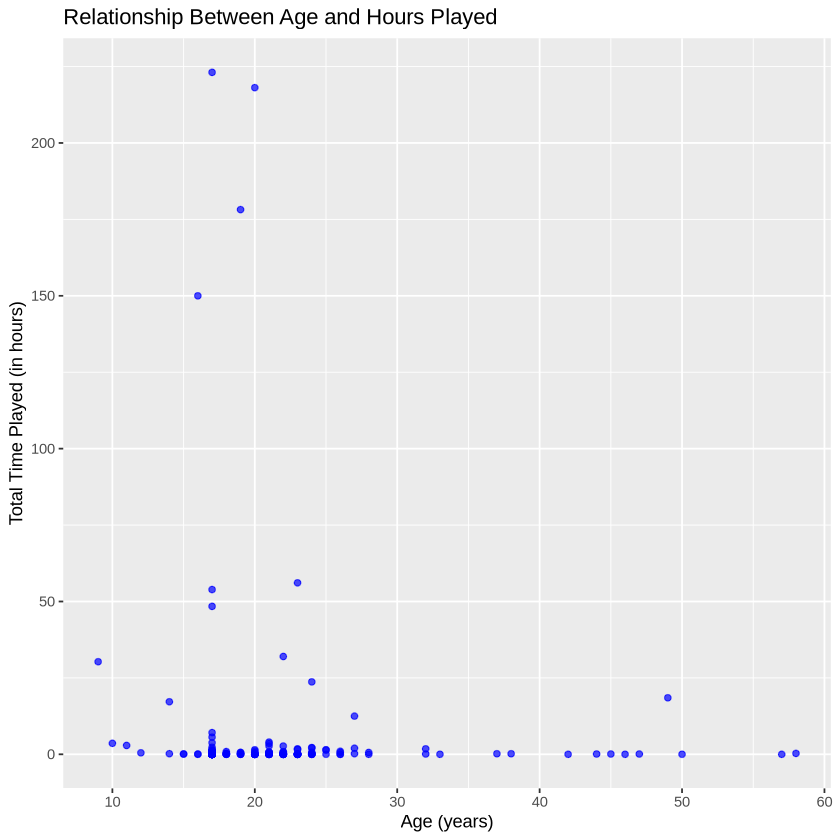

In [2]:
#Creating the Visulizations 

#Plot #1 investigating any relatiobship between age and total hours played 

players_hours_age_plot<-ggplot(players_data, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.7, color = "blue") +
  labs(title = "Relationship Between Age and Hours Played",
    x = "Age (years)",
    y = "Total Time Played (in hours)") 

players_hours_age_plot


In the scatter plot above (Plot #1) we can see that there is no clear relationship between age and total hours played. We can observe a noticeable clustering of points between the ages of approximately 15 and 25, suggesting that most participants in the dataset fall within this age range.

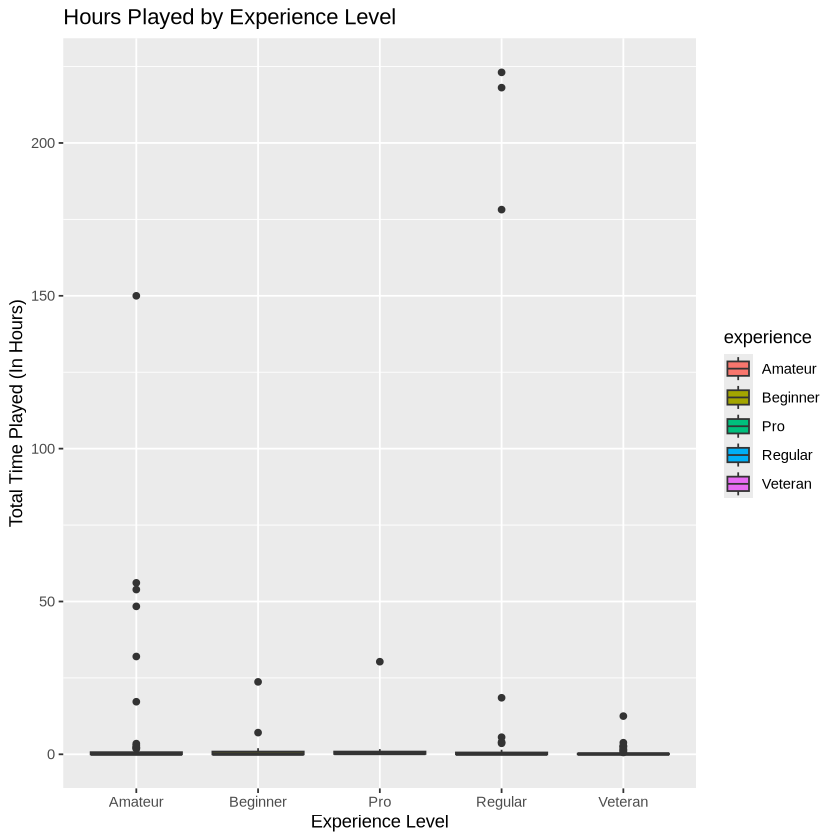

In [3]:

#plot #2 Investigating Potiential Linkage between Hours played and Player Experience

players_experience_hoursplayed_plot<-players_data|>
ggplot(aes(x=experience, y=played_hours, fill = experience))+
geom_boxplot() +
labs(x = "Experience Level", y = "Total Time Played (In Hours)", title = "Hours Played by Experience Level")

players_experience_hoursplayed_plot

Plot #2 displays a box plot reflecting each of the five experience categories from the dataset. We can clearly see that the Amateur group has the most data points compared to the others, representing that multiple players identified themselves as new to the game. We can also note that many of the regular experience leveled players that spent many hours playing Minecraft (with data points above 200 hours).

### 4.) Method and Plan 

 Specific Quetion : Can hours played predict a player’s experience level in the players.csv dataset?

To address my question of interest, I will use the players dataset focusing on the quantitative variable played_hours to classify which experience level a player belongs to. Since experience can take one of five possible categories (Beginner, Amateur, Regular, Veteran, and Pro), this is a multiclass classification problem.

The predictive method chosen is K Nearest Neighbors (KNN). This method is appropriate because it classifies an observation with an unknown label based on how similar it is to other observations with known labels. In our case, KNN will predict a player’s experience level based on how closely their play time resembles that of other players.

For this question, we assume that players with similar total hours of Minecraft play will also have similar experience levels. In other words, players who have played roughly the same amount of time are likely to fall within the same experience category. An example of how this assumption works would be that all new/amateur players may require more hours to become familiar with the game compared to Veteran players who already have experience.

We also assume that the data is properly processed such as scaling it so that the distance calculations used in the KNN algorithm are valid. Since KNN relies on measuring distance between observations to make predictions through a voting system, it is important that all numeric variables have mean of zero and standard deviation of one. 

Since our dataset includes many outliers (some players have extreme numbers of playtime, while others have none), this poses a limitation to our method of classification. Our KNN model will now have altered decision boundaries, which can cause misclassifications of classes. A single outlier added to the dataset can shift the classification boundary, causing an error in the classification for a large region.

Data Processing Steps Needed:
1. Tidy Data = Have no NA values within the data set.
2. Ensure that the data is scaled with a mean of zero and SD of zero 
3. Use the as_factor() function in R to convert the experiences variables into a classifier, allowing KNN to treat it as a categorical response variable.

In order to create the most effient KNN model I will load in the tidymodels package and test a range of k values=tune k (eg. 1–10) and compare their accuracy using a 5 fold cross validation system. The k that gives the highest cross validated accuracy will be chosen as the optimal model.  We will split our original data set into training and test sets, then we will create our K nearest neighbors classifier with only the training set. We will use 75% of the data for training and 25% for testing.


In [4]:
#Code to make the project fully reproducible.
download.file("https://github.com/akaashaujla05/DSCI-100-PPI-46.git", "players.csv")

link to repository 

https://github.com/akaashaujla05/DSCI-100-PPI-46.git